In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="bbfpsleg2H1Y7BjY2ogV")
project = rf.workspace("salal").project("helmet-and-no-helmet-rider-detection-1eknt")
version = project.version(1)
dataset = version.download("yolov8")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 21.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 92.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 120.7 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.13.0.90
    Uninstalling opencv-python-headless-4.13.0.90:
      Successfully uninstalled opencv-python-headless-4.13.0.90
  Attempting uninstall: idna
    Found existing installation: idna 3.11
    Uninstalling idna-3.11:
      Successfully uninstalled idna-3.11
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Helmet-and-no-helmet-rider-detection-1 in yolov8:: 100%|██████████| 3078/3078 [00:00<00:00, 8196.70it/s]


In [ ]:
!ls /content/Helmet-and-no-helmet-rider-detection-1

data.yaml  README.dataset.txt  README.roboflow.txt  test  train  valid


In [ ]:
!cat /content/Helmet-and-no-helmet-rider-detection-1/data.yaml

names:
- With Helmet
- Without Helmet
- licence
nc: 3
roboflow:
  license: CC BY 4.0
  project: helmet-and-no-helmet-rider-detection-1eknt
  url: https://universe.roboflow.com/salal/helmet-and-no-helmet-rider-detection-1eknt/dataset/1
  version: 1
  workspace: salal
test: ../test/images
train: ../train/images
val: ../valid/images


In [ ]:
data_yaml = """
train: train/images
val: valid/images
test: test/images

nc: 3
names:
  0: With Helmet
  1: Without Helmet
  2: licence
"""

with open("data_3classes.yaml", "w") as f:
    f.write(data_yaml)


In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 67.6 MB/s eta 0:00:00


In [ ]:
import torch
torch.cuda.is_available()


True

In [ ]:
from ultralytics import YOLO

model = YOLO("yolov8l.pt")
model.train(
    data="/content/Helmet-and-no-helmet-rider-detection-1/data_3classes.yaml",
    epochs=50,
    imgsz=640,
    batch=16,
    project="Helmet-Detection",
    name="yolov8-helmet-licence"
)


Ultralytics 8.4.9 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, angle=1.0, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/Helmet-and-no-helmet-rider-detection-1/data_3classes.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, end2end=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8l.pt, momentum=0.937, mosaic=1.0, multi_scale=0.0, name=yolov8-helmet-licence3, nbs=64, nms=False, opset=None, optimize=False, optimize

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7f9da8160e00>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04

In [ ]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

# Trained YOLO model load karo
model = YOLO("/content/runs/detect/Helmet-Detection/yolov8-helmet-licence3/weights/best.pt")


In [ ]:
Input = ['/content/imge3.jpg']

In [ ]:
import cv2
for i in Input:
  img = cv2.imread(i)
  img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # OpenCV se RGB convert

  # YOLO inference
  results = model(i)[0]  # first result



image 1/1 /content/imge3.jpg: 640x448 1 With Helmet, 1 Without Helmet, 78.0ms
Speed: 3.9ms preprocess, 78.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 448)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
for box, score, cls in zip(results.boxes.xyxy, results.boxes.conf, results.boxes.cls):
    x1, y1, x2, y2 = map(int, box)
    class_id = int(cls)
    conf = float(score)

    # Draw rectangle
    cv2.rectangle(img_rgb, (x1, y1), (x2, y2), (0, 255, 0), 1)

    # Draw label + confidence
    label = f"{model.names[class_id]} {conf:.2f}"
    cv2.putText(img_rgb, label, (x1, y1-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,255,0), 1)


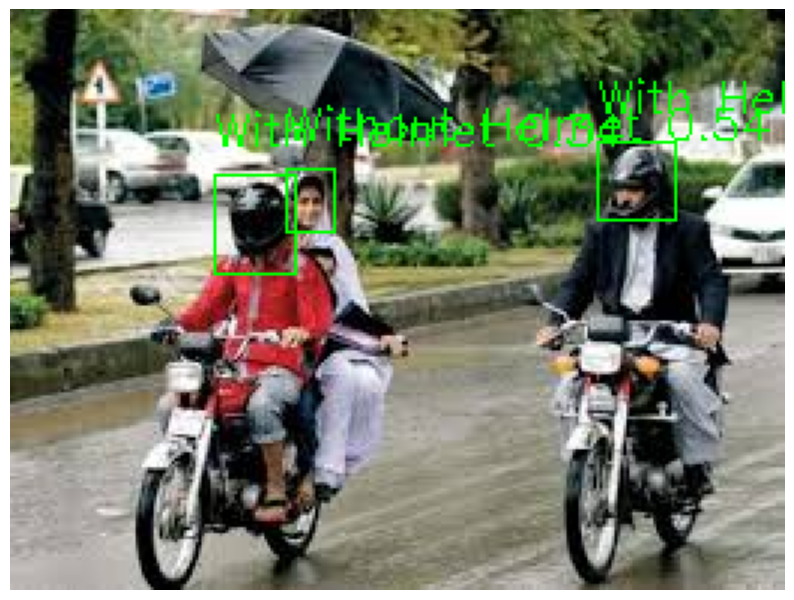

In [ ]:
plt.figure(figsize=(10, 10))
plt.imshow(img_rgb)
plt.axis('off')
plt.show()


In [ ]:
!ls -lh '/content/runs/detect/Helmet-Detection/yolov8-helmet-licence3'

total 6.7M
-rw-r--r-- 1 root root 1.7K Feb  1 17:54 args.yaml
-rw-r--r-- 1 root root 173K Feb  1 18:58 BoxF1_curve.png
-rw-r--r-- 1 root root 153K Feb  1 18:58 BoxP_curve.png
-rw-r--r-- 1 root root 144K Feb  1 18:58 BoxPR_curve.png
-rw-r--r-- 1 root root 161K Feb  1 18:58 BoxR_curve.png
-rw-r--r-- 1 root root 143K Feb  1 18:58 confusion_matrix_normalized.png
-rw-r--r-- 1 root root 132K Feb  1 18:58 confusion_matrix.png
-rw-r--r-- 1 root root 135K Feb  1 17:54 labels.jpg
-rw-r--r-- 1 root root 6.3K Feb  1 18:57 results.csv
-rw-r--r-- 1 root root 243K Feb  1 18:58 results.png
-rw-r--r-- 1 root root 480K Feb  1 17:54 train_batch0.jpg
-rw-r--r-- 1 root root 543K Feb  1 17:55 train_batch1.jpg
-rw-r--r-- 1 root root 478K Feb  1 18:46 train_batch2680.jpg
-rw-r--r-- 1 root root 480K Feb  1 18:46 train_batch2681.jpg
-rw-r--r-- 1 root root 487K Feb  1 18:46 train_batch2682.jpg
-rw-r--r-- 1 root root 596K Feb  1 17:55 train_batch2.jpg
-rw-r--r-- 1 root root 405K Feb  1 18:58 val_batch0_labels.jpg

In [ ]:
!cp -r /content/runs/detect/Helmet-Detection/yolov8-helmet-licence3 /content/drive/MyDrive